In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import string

In [2]:
f = open("logs/center/log.txt", "r") 


Epoch=np.array([])
Loss=np.array([])
Acc=np.array([])
Lr=np.array([])
i=0
for line in f:
        if "Acc" in line:
            print(line)
            word= line.split(' ')
            i=+1
            print(word[7])
            acc=float(word[9][:-1])
            Acc=np.append(Acc,acc)
            
            loss=float(word[7][:-1])
            Loss=np.append(Loss,loss)
            
            lr=float(word[12])
            Lr=np.append(Lr,lr)
            
            
            if line[57] == "]":
                Epoch = np.append(Epoch,line[56])
            else:
                Epoch = np.append(Epoch,line[56:58])


2020-05-17 11:32:12,722 reid_baseline.train INFO: Epoch[1] Iteration[20/1777] Loss: 9.344, Acc: 0.003, Base Lr: 3.82e-05

9.344,
2020-05-17 11:32:24,599 reid_baseline.train INFO: Epoch[1] Iteration[40/1777] Loss: 9.189, Acc: 0.002, Base Lr: 3.82e-05

9.189,


In [3]:
print(Lr.shape)
print(np.max(Acc))



(2,)
0.003


In [4]:

simulation1 = np.array([Epoch, Lr, Acc, Loss])
print(simulation1.shape)
path='./logs/center/simulation.npy'
np.save(path,simulation1.astype(np.float))

(4, 2)


In [5]:

simulation=np.load('./logs/simulation1/simulation.npy')
simulation=np.asarray(simulation)
print(type(simulation[0][0]))
simulation = simulation


<class 'numpy.float64'>


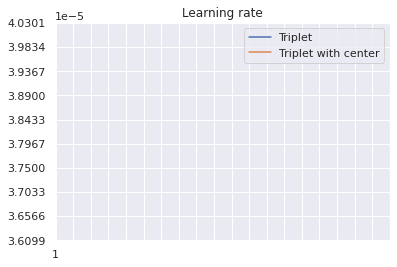

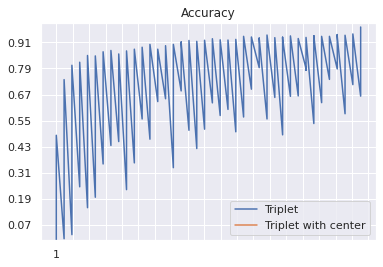

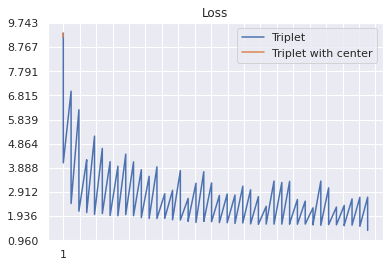

In [6]:
import seaborn as sns

sns.set()

plt.title('Learning rate')
plt.plot(simulation1[0][:],simulation1[1][:].astype(np.float),label='Triplet')
plt.plot(Epoch,Lr,label='Triplet with center')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,40,20))

plt.figure()
plt.title('Accuracy')
plt.plot(simulation[0][:]-1,simulation[2][:],label='Triplet')
plt.plot(Epoch,Acc,label='Triplet with center')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,40,20))
ax.set_ylim((0,1))

plt.figure()
plt.title('Loss')
plt.plot(simulation[0][:]-1,simulation[3][:],label='Triplet')
plt.plot(Epoch,Loss,label='Triplet with center')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,40,20))
